# Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples and
14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("boston_housing.csv")

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.shape

(506, 14)

In [ ]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

/home/admin1/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
x=df[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]
y=df['medv']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print(x_train)

         crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
42    0.14150   0.0   6.91     0  0.448  6.169   6.6  5.7209    3  233.0   
58    0.15445  25.0   5.13     0  0.453  6.145  29.2  7.8148    8  284.0   
385  16.81180   0.0  18.10     0  0.700  5.277  98.1  1.4261   24  666.0   
78    0.05646   0.0  12.83     0  0.437  6.232  53.7  5.0141    5  398.0   
424   8.79212   0.0  18.10     0  0.584  5.565  70.6  2.0635   24  666.0   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
255   0.03548  80.0   3.64     0  0.392  5.876  19.1  9.2203    1  315.0   
72    0.09164   0.0  10.81     0  0.413  6.065   7.8  5.2873    4  305.0   
396   5.87205   0.0  18.10     0  0.693  6.405  96.0  1.6768   24  666.0   
235   0.33045   0.0   6.20     0  0.507  6.086  61.5  3.6519    8  307.0   
37    0.08014   0.0   5.96     0  0.499  5.850  41.5  3.9342    5  279.0   

     ptratio   black  lstat  
42      17.9  383.37   5.81  
58      19.7  390.68   6.86

In [ ]:
print(y_train)

42     25.3
58     23.3
385     7.2
78     21.2
424    11.7
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: medv, Length: 404, dtype: float64


In [ ]:
print(x_test)

         crim    zn  indus  chas    nox     rm    age     dis  rad    tax  \
307   0.04932  33.0   2.18     0  0.472  6.849   70.3  3.1827    7  222.0   
343   0.02543  55.0   3.78     0  0.484  6.696   56.4  5.7321    5  370.0   
47    0.22927   0.0   6.91     0  0.448  6.030   85.5  5.6894    3  233.0   
67    0.05789  12.5   6.07     0  0.409  5.878   21.4  6.4980    4  345.0   
362   3.67822   0.0  18.10     0  0.770  5.362   96.2  2.1036   24  666.0   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...    ...   
92    0.04203  28.0  15.04     0  0.464  6.442   53.6  3.6659    4  270.0   
224   0.31533   0.0   6.20     0  0.504  8.266   78.3  2.8944    8  307.0   
110   0.10793   0.0   8.56     0  0.520  6.195   54.4  2.7778    5  384.0   
426  12.24720   0.0  18.10     0  0.584  5.837   59.7  1.9976   24  666.0   
443   9.96654   0.0  18.10     0  0.740  6.485  100.0  1.9784   24  666.0   

     ptratio   black  lstat  
307     18.4  396.90   7.53  
343     17.6  3

In [ ]:
print(y_test)

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
       ... 
92     22.9
224    44.8
110    21.7
426    10.2
443    15.4
Name: medv, Length: 102, dtype: float64


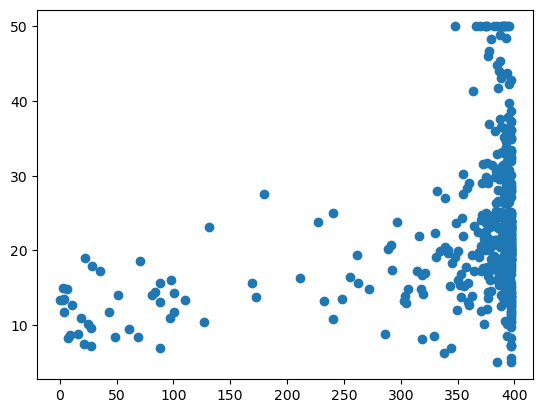

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['black'],df['medv'])

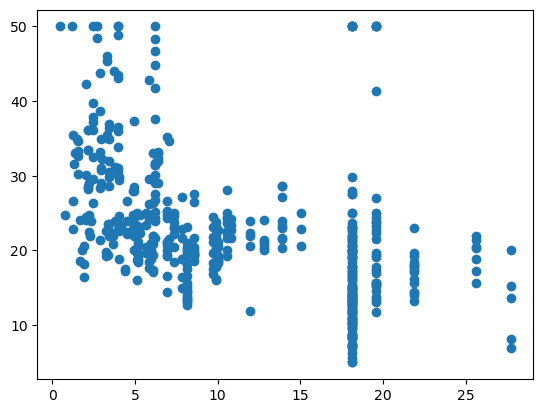

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['indus'],df['medv'])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.predict(x_test)

array([32.65503184, 28.0934953 , 18.02901829, 21.47671576, 18.8254387 ,
       19.87997758, 32.42014863, 18.06597765, 24.42277848, 27.00977832,
       27.04081017, 28.75196794, 21.15677699, 26.85200196, 23.38835945,
       20.66241266, 17.33082198, 38.24813601, 30.50550873,  8.74436733,
       20.80203902, 16.26328126, 25.21805656, 24.85175752, 31.384365  ,
       10.71311063, 13.80434635, 16.65930389, 36.52625779, 14.66750528,
       21.12114902, 13.95558618, 43.16210242, 17.97539649, 21.80116017,
       20.58294808, 17.59938821, 27.2212319 ,  9.46139365, 19.82963781,
       24.30751863, 21.18528812, 29.57235682, 16.3431752 , 19.31483171,
       14.56343172, 39.20885479, 18.10887551, 25.91223267, 20.33018802,
       25.16282007, 24.42921237, 25.07123258, 26.6603279 ,  4.56151258,
       24.0818735 , 10.88682673, 26.88926656, 16.85598381, 35.88704363,
       19.55733853, 27.51928921, 16.58436103, 18.77551029, 11.13872875,
       32.36392607, 36.72833773, 21.95924582, 24.57949647, 25.14

In [ ]:
lr.score(x_test,y_test)

0.7634174432138496

In [ ]:
y_pred = lr.predict(x_test)
print(y_pred)

[32.65503184 28.0934953  18.02901829 21.47671576 18.8254387  19.87997758
 32.42014863 18.06597765 24.42277848 27.00977832 27.04081017 28.75196794
 21.15677699 26.85200196 23.38835945 20.66241266 17.33082198 38.24813601
 30.50550873  8.74436733 20.80203902 16.26328126 25.21805656 24.85175752
 31.384365   10.71311063 13.80434635 16.65930389 36.52625779 14.66750528
 21.12114902 13.95558618 43.16210242 17.97539649 21.80116017 20.58294808
 17.59938821 27.2212319   9.46139365 19.82963781 24.30751863 21.18528812
 29.57235682 16.3431752  19.31483171 14.56343172 39.20885479 18.10887551
 25.91223267 20.33018802 25.16282007 24.42921237 25.07123258 26.6603279
  4.56151258 24.0818735  10.88682673 26.88926656 16.85598381 35.88704363
 19.55733853 27.51928921 16.58436103 18.77551029 11.13872875 32.36392607
 36.72833773 21.95924582 24.57949647 25.14868695 23.42841301  6.90732017
 16.56298149 20.41940517 20.80403418 21.54219598 33.85383463 27.94645899
 25.17281456 34.65883942 18.62487738 23.97375565 34.

In [ ]:
print(y_test)

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
       ... 
92     22.9
224    44.8
110    21.7
426    10.2
443    15.4
Name: medv, Length: 102, dtype: float64


In [ ]:
print( np.mean((y_pred - y_test)**2 ))

23.380836480269984


In [ ]:
# Check the model performance/accuracy using Mean Squared error (MSE) and sklearn.metrics
from sklearn.metrics import mean_squared_error
print( mean_squared_error(y_test, y_pred))

23.380836480269984


In [ ]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f'Mean Squared Error: {mse}',f'Mean Absolute Error: {mae}',f'Root Mean Squared Error: {rmse}',sep='\n')

Mean Squared Error: 23.380836480269984
Mean Absolute Error: 3.750712180838916
Root Mean Squared Error: 4.835373458200513
